In [1]:
import numpy as np

In [2]:
%pip install transformers==4.37.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 27.9 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.38.2
    Uninstalling transformers-4.38.2:
      Successfully uninstalled transformers-4.38.2


In [43]:
import pandas as pd

root_path = '/content/Dataset.xlsx'

df = pd.read_excel(root_path)
df.head()

,SL,Emotion,Text,Year,Racial Biases,Hatred Percentage,Depression Percentage
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,2016,NaN,NaN,NaN
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,2016,NaN,NaN,NaN
2,3,angry,ভেজাল নির্বাচন ।,2016,NaN,NaN,NaN
3,4,happy,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,2016,NaN,NaN,NaN
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...",2016,NaN,NaN,NaN


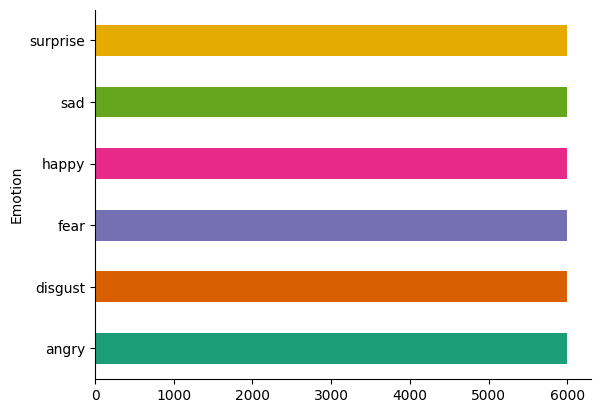

In [45]:
# @title emotion

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Emotion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [46]:
df['count'] = df['Text'].apply(lambda x: len(x.split()))

In [47]:
df['encoded_text'] = df['Emotion'].astype('category').cat.codes

df.head(10)

,SL,Emotion,Text,Year,Racial Biases,Hatred Percentage,Depression Percentage,count,encoded_text
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,2016,NaN,NaN,NaN,12,1
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,2016,NaN,NaN,NaN,21,1
2,3,angry,ভেজাল নির্বাচন ।,2016,NaN,NaN,NaN,3,0
3,4,happy,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,2016,NaN,NaN,NaN,14,3
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...",2016,NaN,NaN,NaN,13,0
5,6,surprise,তবে বিজয়ী ও নিকটতম প্রতিদ্বন্দ্বীর মধ্যে ভোটে...,2016,NaN,NaN,NaN,28,5
6,7,happy,কিন্তু কিছু কিছু লোক এই নির্বাচনের মাধ্যমে আওয়...,2016,NaN,NaN,NaN,10,3
7,8,angry,"ভোটের হার কম হলে দোষ, বেশি হলে দোষ, ভোটের সময় ...",2016,NaN,NaN,NaN,19,0
8,9,disgust,সাত খন্ড রামায়ন পাঠ শেষে আপনি জানতে চান সীতা ক...,2016,NaN,NaN,NaN,12,1
9,10,angry,আপনি কী চান সেটাই আগে ভাবুন?,2016,NaN,NaN,NaN,6,0


In [48]:
!pip install bangla-stemmer

In [49]:
from bangla_stemmer.stemmer import stemmer

stmr = stemmer.BanglaStemmer()

valid_bangla_char = set(['া','ি','ী','ু','ূ','ৃ','ে','ৈ','ো','ৌ','ক','খ',
'গ','ঘ','ঙ','চ','ছ','জ','ঝ','ঞ','ট','ঠ','ড','ঢ','ণ','ত','থ','দ','ধ','ন',
'প','ফ','ব','ভ','ম','য','র','ল','শ','ষ','স','হ','ড়','ঢ়','য়','ৎ','ং','ঃ'
'‍ঁ','‍্','‍্য','‍‍্র','‍‍র্ক','‍্ব','৺','ক্ষ','জ্ঞ','অ','আ','ই','ঈ','উ','ঊ','ঋ','এ',
'ঐ','ও','ঔ','অ্যা','্','য়','ঁ','ড়','়','ঃ'])

stop_words = set([''])
stop_words_file_lines=open('/content/stop_words.txt','r',encoding='utf-8-sig').readlines()
for word in stop_words_file_lines:
    stop_words.add(word.strip())

def puncuation_removal(sentence):
    words = sentence.split()
    unique_words_per_sentence = []
    for every_word in words:
        correct_word = ''
        for each_char in every_word:
            if each_char in valid_bangla_char:
                correct_word += each_char
            else:
                correct_word = ''
        if correct_word not in stop_words:
            unique_words_per_sentence.append(correct_word.strip())
        correct_word = ''

    new_refined_sentence = ' '.join(stmr.stem(unique_words_per_sentence))

    return new_refined_sentence

df["text_clean"] = df["Text"].apply(lambda x: puncuation_removal(x))
df.head()

Streaming output truncated to the last 5000 lines.
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied third rules..
applied first rules..
applied fourth rules..
applied second rules..
applied third rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
appli

,SL,Emotion,Text,Year,Racial Biases,Hatred Percentage,Depression Percentage,count,encoded_text,text_clean
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,2016,NaN,NaN,NaN,12,1,নির্বাচন আগ রাত সুষ্টু শান্তিপূর্ণ ভোট বাক্স ...
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,2016,NaN,NaN,NaN,21,1,জনগণ মন আনন্দে ভোট কাস্ট দেশদ্রোহী পেট্রল বোমা...
2,3,angry,ভেজাল নির্বাচন ।,2016,NaN,NaN,NaN,3,0,ভেজাল নির্বাচন
3,4,happy,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,2016,NaN,NaN,NaN,14,3,বিএনপি রাজা সমর্থক হার দেশের আমি সন্তুষ্ খুঁজে
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...",2016,NaN,NaN,NaN,13,0,সূক্ষ্ম কারচুপি এতদিন এক কথ কথা বাস্তব রূপ


In [50]:
df.head(20)

,SL,Emotion,Text,Year,Racial Biases,Hatred Percentage,Depression Percentage,count,encoded_text,text_clean
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,2016,NaN,NaN,NaN,12,1,নির্বাচন আগ রাত সুষ্টু শান্তিপূর্ণ ভোট বাক্স ...
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,2016,NaN,NaN,NaN,21,1,জনগণ মন আনন্দে ভোট কাস্ট দেশদ্রোহী পেট্রল বোমা...
2,3,angry,ভেজাল নির্বাচন ।,2016,NaN,NaN,NaN,3,0,ভেজাল নির্বাচন
3,4,happy,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,2016,NaN,NaN,NaN,14,3,বিএনপি রাজা সমর্থক হার দেশের আমি সন্তুষ্ খুঁজে
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...",2016,NaN,NaN,NaN,13,0,সূক্ষ্ম কারচুপি এতদিন এক কথ কথা বাস্তব রূপ
5,6,surprise,তবে বিজয়ী ও নিকটতম প্রতিদ্বন্দ্বীর মধ্যে ভোটে...,2016,NaN,NaN,NaN,28,5,বিজয়ী নিকটতম প্রতিদ্বন্দ্বীর ভোট অস্বাভাবিক ব...
6,7,happy,কিন্তু কিছু কিছু লোক এই নির্বাচনের মাধ্যমে আওয়...,2016,NaN,NaN,NaN,10,3,লোক নির্বাচন আওয়ামিলীগ বিজয় দেখ
7,8,angry,"ভোটের হার কম হলে দোষ, বেশি হলে দোষ, ভোটের সময় ...",2016,NaN,NaN,NaN,19,0,ভোট হার কম ভোট সময় মারামারি হওয়াটাও আসলে সমালো...
8,9,disgust,সাত খন্ড রামায়ন পাঠ শেষে আপনি জানতে চান সীতা ক...,2016,NaN,NaN,NaN,12,1,সাত খন্ড রামায়ন পাঠ শাষ সীতা কার বাপ
9,10,angry,আপনি কী চান সেটাই আগে ভাবুন?,2016,NaN,NaN,NaN,6,0,


In [51]:
category_count = df['Emotion'].value_counts()

categories = category_count.index

categories

Index(['disgust', 'angry', 'happy', 'surprise', 'fear', 'sad'], dtype='object')

In [52]:
category_count

disgust     6000
angry       6000
happy       6000
surprise    6000
fear        6000
sad         6000
Name: Emotion, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# df = data[['text_clean', 'Label']]

# Y = pd.get_dummies(data['category']).values
X_train, X_test, y_train, y_test = train_test_split(df['text_clean'], df['encoded_text'], random_state=42, stratify=df['encoded_text'])
print(np.unique(y_train))

y_train = to_categorical(y_train, num_classes=6)
y_test = to_categorical(y_test, num_classes=6)

[0 1 2 3 4 5]


In [54]:
y_train

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [55]:
from transformers import BertModel, BertTokenizer, TFBertModel

bert_model_name = "sagorsarker/bangla-bert-base"
bert_tokenizer = BertTokenizer.from_pretrained(bert_model_name)
bert_model = TFBertModel.from_pretrained(bert_model_name)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [56]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

print(tf.config.list_physical_devices('GPU'))

text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
input_ids = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='attention_mask')

inputs = {'input_ids': input_ids, 'attention_mask': attention_mask}

outputs = bert_model(inputs)

pooled_output = outputs.pooler_output
pooled_output = Dropout(0.9)(pooled_output)

hidden_layer = Dense(64, activation='relu')(pooled_output)
hidden_layer = Dropout(0.7)(hidden_layer)

num_classes = 6
classification_layer = tf.keras.layers.Dense(num_classes, activation='softmax')(pooled_output)

# Define model inputs and outputs
inputs = {'input_ids': input_ids, 'attention_mask': attention_mask}
outputs = {'classification': classification_layer}

# Define model
model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [57]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=METRICS)

In [58]:
# model.fit(X_train, y_train, epochs=2)
train_encodings = bert_tokenizer(X_train.tolist(), padding=True, truncation=True, max_length=128, return_tensors='tf')
# train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=2)

history = model.fit(
    x=(train_encodings['input_ids'], train_encodings['attention_mask']),
    y=y_train,
    epochs=2,
    batch_size=32
)

Epoch 1/2
844/844 [==============================] - 704s 786ms/step - loss: 2.8591 - accuracy: 0.7818 - precision: 0.1678 - recall: 0.0781
Epoch 2/2
844/844 [==============================] - 665s 787ms/step - loss: 2.0147 - accuracy: 0.8247 - precision: 0.1738 - recall: 0.0137


In [59]:
model.save('/content/BERT.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [60]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
# Define the custom object scope
custom_objects = {'TFBertModel': TFBertModel}

# Load the model using the custom object scope
with tf.keras.utils.custom_object_scope(custom_objects):
    model = tf.keras.models.load_model('/content/BERT.h5')


test_encodings = bert_tokenizer(X_test.tolist(), padding=True, truncation=True, max_length=128, return_tensors='tf')

# Get the predicted labels for the test data
yy_pred = model.predict(x=(test_encodings['input_ids'], test_encodings['attention_mask']))
y_pred = np.argmax(yy_pred['classification'], axis=1)# y_pred = np.argmax(y_pred, axis=1)

y_true = np.argmax(y_test, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)
print(classification_report(y_true, y_pred))

282/282 [==============================] - 79s 269ms/step
[[   0 1500    0    0    0    0]
 [   0 1500    0    0    0    0]
 [   0 1500    0    0    0    0]
 [   0 1500    0    0    0    0]
 [   0 1500    0    0    0    0]
 [   0 1500    0    0    0    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1500
           1       0.17      1.00      0.29      1500
           2       0.00      0.00      0.00      1500
           3       0.00      0.00      0.00      1500
           4       0.00      0.00      0.00      1500
           5       0.00      0.00      0.00      1500

    accuracy                           0.17      9000
   macro avg       0.03      0.17      0.05      9000
weighted avg       0.03      0.17      0.05      9000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
test_encodings['input_ids']
test_encodings['attention_mask']

<tf.Tensor: shape=(3157, 128), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>

In [39]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
from transformers import BertTokenizer, TFBertModel

# Load the BERT tokenizer
bert_tokenizer = BertTokenizer.from_pretrained('sagorsarker/bangla-bert-base')

# Sample text for testing
sample_text = "আমি মুসলিমদের ঘৃণা করি"

# Encode the sample text using the BERT tokenizer
sample_encoding = bert_tokenizer(sample_text, padding=True, truncation=True, max_length=128, return_tensors='tf')

# Get the predicted label for the sample text
sample_prediction = model.predict(x=(sample_encoding['input_ids'], sample_encoding['attention_mask']))
sample_pred_label = np.argmax(sample_prediction['classification'], axis=1)

# Print the predicted label
print("Predicted Label:", sample_pred_label)


1/1 [==============================] - 4s 4s/step
Predicted Label: [3]


In [22]:
df.head(200)

,emotion,message,count,encoded_text,text_clean
0,sad,"বরাবর, মাননীয় প্রধানমন্ত্রী গণপ্রজাতন্ত্রী বা...",353,4,মাননীয় প্রধানমন্ত্রী গণপ্রজাতন্ত্রী বাংলাদেশ ...
1,sad,তদন্ত করে লাভ কী ? কোন দিন কোন তদন্তের পর কিছু...,72,4,তদন্ত লাভ তদন্ত হয় মন রাজনৈতিক শক্তির তদন্ত পা...
2,angry,দেশকি মধ্যম আয়ের দেশে রুপান্তর হচ্ছে নাকি মগের...,12,0,দেশকি মধ্যম আয় দেশ রুপান্তর মগ মুলুক দেশ পরিনত
3,happy,আমি গর্বিত আমি মুসলিম। আমি সংগ্রামী। আমি যোদ্ধ...,25,3,গর্বিত চির আল্লাহ ছার নিচু নার তাকবির আল্লাহু
4,angry,রাতের বেলা আবার কিসের সকাল।,5,0,রাত বেলা কিস
...,...,...,...,...,...
195,fear,আজ যদি তনুর বিচার না হয় কাল তোর বোনের ধর্ষিতার...,15,2,তনুর বিচ কাল তোর বোন ধর্ষিত বিচ রাখোস
196,sad,কি পেয়েছি আমরা শাদিন দেশে চুর বাটপার,7,4,পেয়েছি শাদিন দেশ চুর বাটপ
197,sad,৭১ টিভি ও ফ্রেশ ব্র্যান্ডের সকল পন্য বর্জন করু...,164,4,টিভি ফ্রেশ ব্র্যান্ড সকল পন্য বর্জন ফ্রেশ বাংল...
198,sad,সোয়াবের কাজ বিনা হিসাবে জাহান্নাম।,5,4,সোয়াব
